# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import zscore

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    silhouette_score,
)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# to compute distances
from scipy.spatial.distance import cdist

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Importing the data

In [2]:
df = pd.read_csv('A2Z_milestone_2_3_input.csv')

In [3]:
df.head()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
# Converting columns of object types to categorical data types 
for col in df.select_dtypes('object').columns:
    df[col]=df[col].astype('category')

for col in ['Senior_Citizen','Gender']:
    df[col]=df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         6499 non-null   category
 1   Gender             6499 non-null   category
 2   Senior_Citizen     6499 non-null   category
 3   Partner            6499 non-null   category
 4   Dependents         6499 non-null   category
 5   Tenure             6499 non-null   int64   
 6   Phone_Service      6499 non-null   category
 7   Multiple_Lines     6499 non-null   category
 8   Internet_Service   6499 non-null   category
 9   Online_Security    6499 non-null   category
 10  Online_Backup      6499 non-null   category
 11  Device_Protection  6499 non-null   category
 12  Tech_Support       6499 non-null   category
 13  Streaming_TV       6499 non-null   category
 14  Streaming_Movies   6499 non-null   category
 15  Contract           6499 non-null   category
 16  Paperl

In [5]:
# Customer ID is not needed for model
df.drop(["CustomerID"], axis=1, inplace=True)

# Changing 'yes' and 'no' to '1' and '0'
df['Partner'] = df['Partner'].replace({'Yes':1, 'No':0})
df['Dependents'] = df['Dependents'].replace({'Yes':1, 'No':0})
df['Phone_Service'] = df['Phone_Service'].replace({'Yes':1, 'No':0})
df['Paperless_Billing'] = df['Paperless_Billing'].replace({'Yes':1, 'No':0})

# Building the Decision Tree model

In [6]:
# creating dummy varibles 
dummy_data = pd.get_dummies(
    df,
    columns=[
        "Multiple_Lines",
        "Internet_Service",
        "Online_Security",
        "Online_Backup",
        "Device_Protection",
        "Tech_Support",
        "Streaming_TV",
        "Streaming_Movies",
        "Contract",
        "Payment_Method",
    ],
    drop_first=True,
)
dummy_data.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes,Online_Backup_No internet service,Online_Backup_Yes,Device_Protection_No internet service,Device_Protection_Yes,Tech_Support_No internet service,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


- Creating the dummy variables

In [7]:
# Now we split the data into (X=Independant variable) and (Y=Dependant variable)

X = dummy_data.drop(['Churn'], axis=1) #independant variable
y = dummy_data[['Churn']]              #dependant variable

- Splitting the data

In [8]:
X.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes,Online_Backup_No internet service,Online_Backup_Yes,Device_Protection_No internet service,Device_Protection_Yes,Tech_Support_No internet service,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Gender                                  6499 non-null   category
 1   Senior_Citizen                          6499 non-null   category
 2   Partner                                 6499 non-null   int64   
 3   Dependents                              6499 non-null   int64   
 4   Tenure                                  6499 non-null   int64   
 5   Phone_Service                           6499 non-null   int64   
 6   Paperless_Billing                       6499 non-null   int64   
 7   Monthly_Charges                         6499 non-null   float64 
 8   Total_Charges                           6499 non-null   float64 
 9   Multiple_Lines_No phone service         6499 non-null   uint8   
 10  Multiple_Lines_Yes                      6499 non

In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Churn   6499 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

- splitting data into train and test sets 70 train and 30 test

In [12]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4549
Number of rows in test data = 1950


In [13]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Churn
0        0.734227
1        0.265773
dtype: float64
Percentage of classes in test set:
Churn
0        0.740513
1        0.259487
dtype: float64


In [14]:
model = DecisionTreeClassifier(
    criterion="gini", random_state=1
)

- Creating the model

In [15]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

- Fitting the model onto the training data

In [16]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [17]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

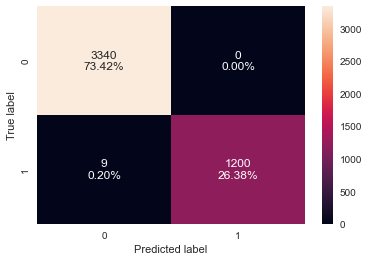

In [18]:
confusion_matrix_sklearn(model, X_train, y_train)

In [19]:
#Checking model performance on training set

decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.998022,0.992556,1.0,0.996264


- Looking at the stats above you see we have 99% Accuracy, 99% Recall, 1.0 on Precision
- This is due to the model being overfit

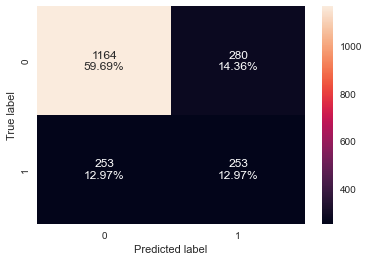

In [20]:
confusion_matrix_sklearn(model, X_test, y_test)

In [21]:
#Checking model performance on test set

decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.726667,0.5,0.474672,0.487007


- Everything drops when we test the model on our test data because the model is over-fitting the training set

In [22]:
# creating a list of column names
feature_names = X_train.columns.to_list()

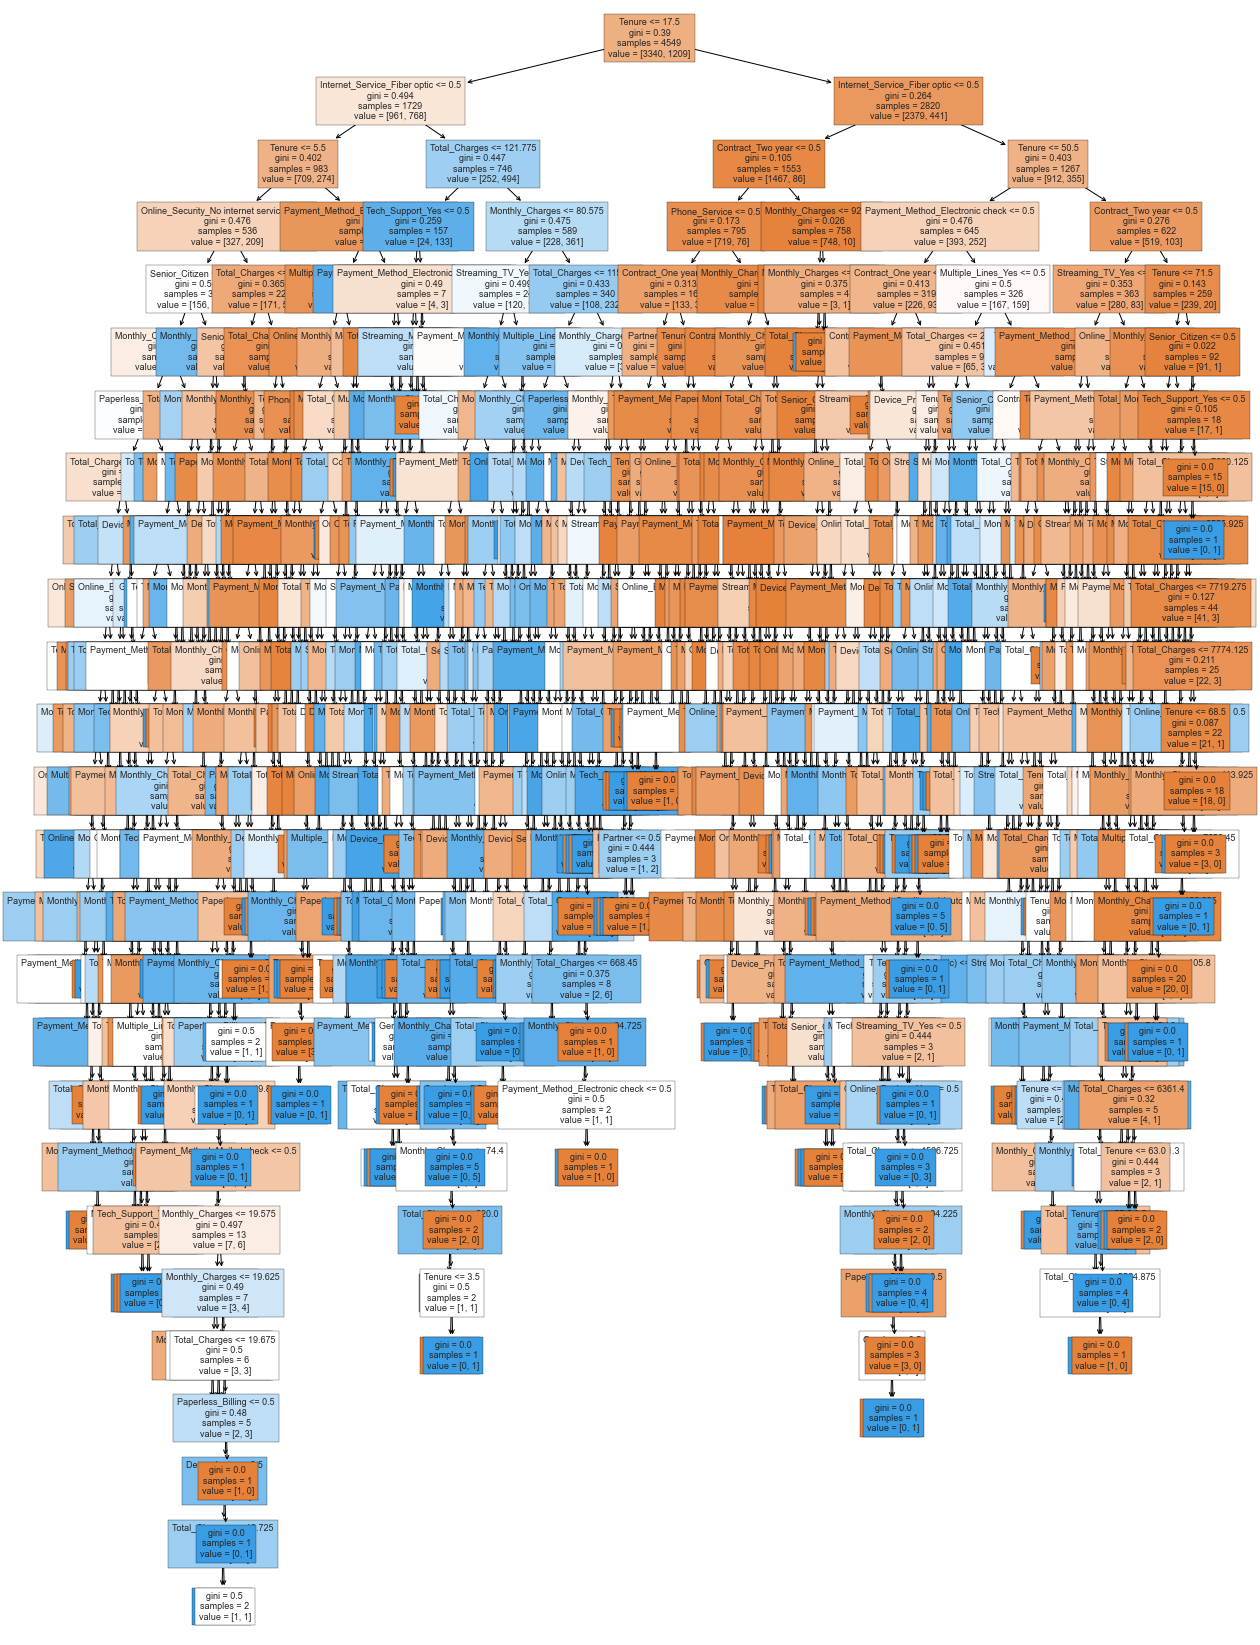

In [23]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing     
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

In [24]:
feature_importance = pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
print(feature_importance)

                                             Imp
Tenure                                  0.204813
Monthly_Charges                         0.202828
Total_Charges                           0.195337
Internet_Service_Fiber optic            0.110543
Gender                                  0.030645
Partner                                 0.024779
Senior_Citizen                          0.022220
Payment_Method_Electronic check         0.020973
Paperless_Billing                       0.018577
Online_Backup_Yes                       0.017659
Tech_Support_Yes                        0.017628
Online_Security_Yes                     0.015105
Streaming_TV_Yes                        0.014856
Dependents                              0.013779
Multiple_Lines_Yes                      0.013416
Device_Protection_Yes                   0.011669
Payment_Method_Mailed check             0.011161
Streaming_Movies_Yes                    0.010833
Payment_Method_Credit card (automatic)  0.010365
Online_Security_No i

Text(0.5, 0, 'Relative Importance')

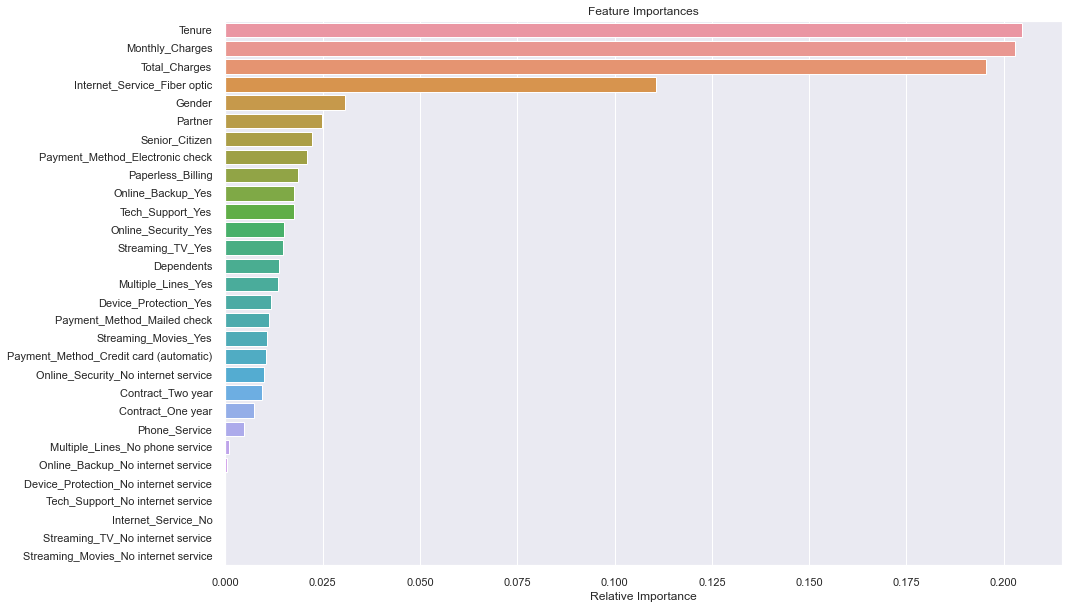

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(feature_importance["Imp"],feature_importance.index)
ax.set_title("Feature Importances")
ax.set_xlabel("Relative Importance")

- Tenure, Fiber Optic Service and Total Charges are the three most important Features.
- Very large Overfit model

# Pre-pruning using GridSearch

In [26]:
estimator = DecisionTreeClassifier(random_state=1)

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Fit the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_
 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

In [27]:
#Checking model performance on estimator model train set

decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.787426,0.408602,0.662198,0.505371


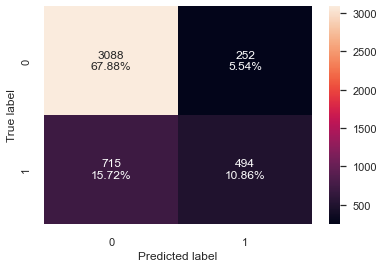

In [28]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [29]:
#Checking model performance on estimator model train set

decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.79641,0.401186,0.683502,0.505604


- We can see that now we have a closer Accuracy and F1 score between training and test sets while also making a simpler model

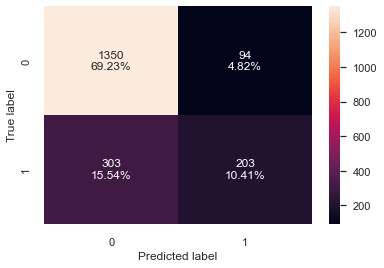

In [30]:
confusion_matrix_sklearn(estimator, X_test, y_test)

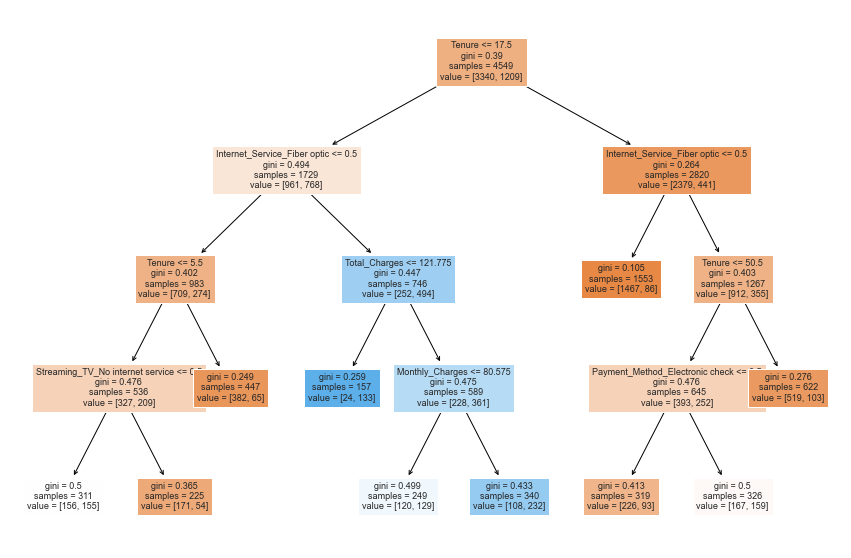

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

- Tree is much smaller after we use Pre-pruning using GridSearch.

In [32]:
feature_importance = pd.DataFrame(
    estimator.feature_importances_, columns=["Imp"], index=X_train.columns
).sort_values(by="Imp", ascending=False)

print(feature_importance)

# Here we will see that importance of features has increased

                                             Imp
Tenure                                  0.492100
Internet_Service_Fiber optic            0.402379
Streaming_TV_No internet service        0.035925
Total_Charges                           0.028030
Payment_Method_Electronic check         0.025579
Monthly_Charges                         0.015988
Streaming_Movies_No internet service    0.000000
Tech_Support_No internet service        0.000000
Tech_Support_Yes                        0.000000
Streaming_TV_Yes                        0.000000
Gender                                  0.000000
Streaming_Movies_Yes                    0.000000
Device_Protection_No internet service   0.000000
Contract_One year                       0.000000
Contract_Two year                       0.000000
Payment_Method_Credit card (automatic)  0.000000
Device_Protection_Yes                   0.000000
Online_Backup_No internet service       0.000000
Online_Backup_Yes                       0.000000
Senior_Citizen      

- We have also tighten up our importance features.

Text(0.5, 0, 'Relative Importance')

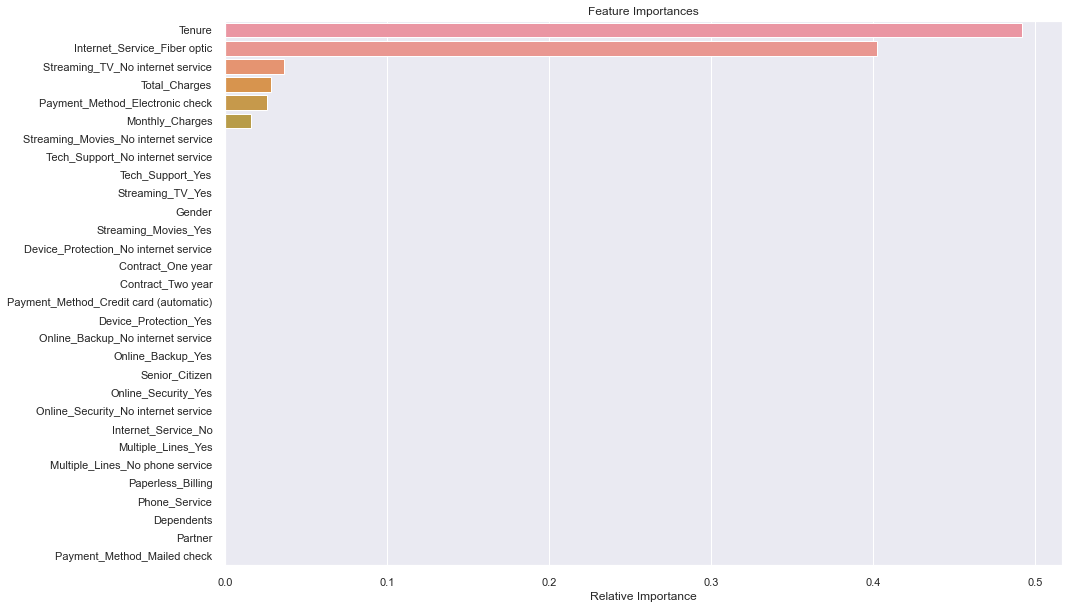

In [33]:
ax = sns.barplot(feature_importance["Imp"],feature_importance.index)
ax.set_title("Feature Importances")
ax.set_xlabel("Relative Importance")

# Cost Complexity Pruning

In [34]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [35]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.001978
1,0.000055,0.002088
2,0.000055,0.002198
3,0.000073,0.002345
4,0.000073,0.002418
...,...,...
371,0.006407,0.301264
372,0.007054,0.308318
373,0.015504,0.323823
374,0.027419,0.351242


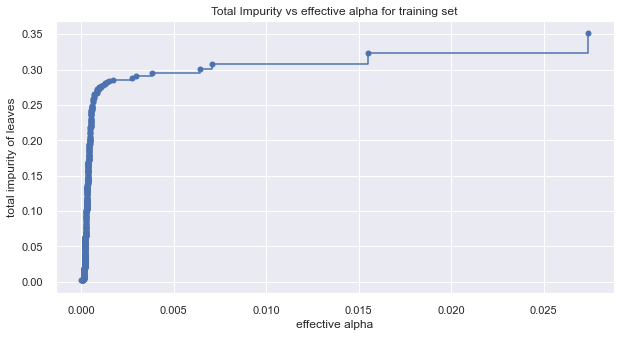

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [37]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03903346638860816


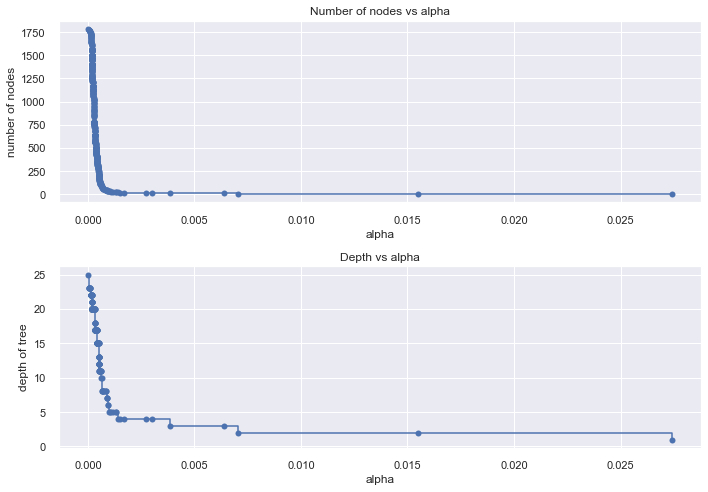

In [38]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [39]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [40]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

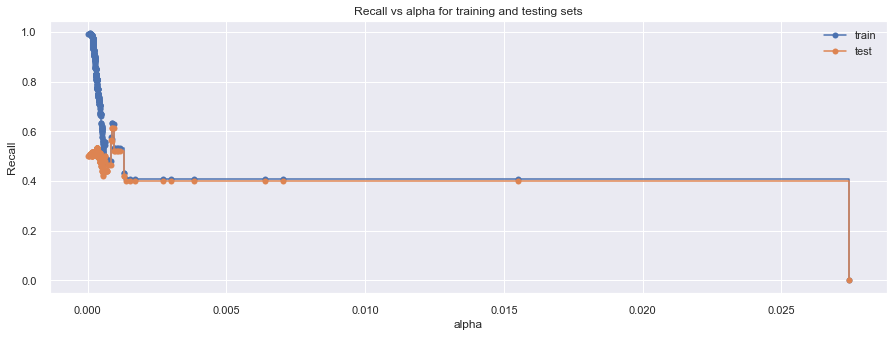

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [42]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0008836857837542338, random_state=1)


In [43]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.798197,0.633581,0.617244,0.625306


- Using Cost Complexity Pruning we maximized Recall between both train and test sets.

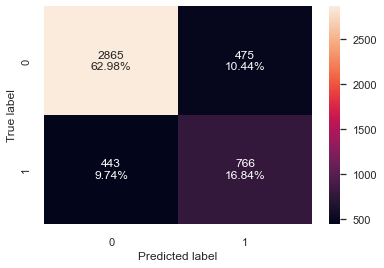

In [44]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [45]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.797436,0.614625,0.608611,0.611603


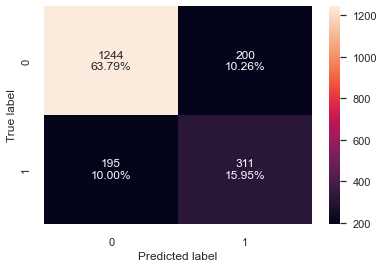

In [46]:
confusion_matrix_sklearn(best_model, X_test, y_test)

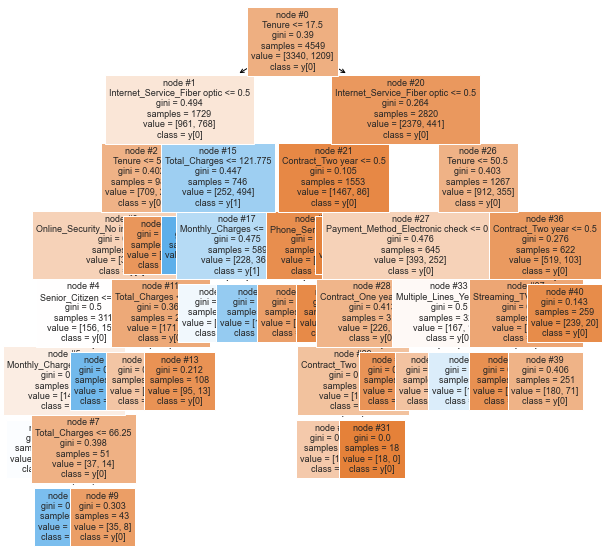

In [47]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [48]:
feature_importance = pd.DataFrame(
    best_model.feature_importances_, columns=["Imp"], index=X_train.columns
).sort_values(by="Imp", ascending=False)

print(feature_importance)

                                             Imp
Tenure                                  0.440106
Internet_Service_Fiber optic            0.359864
Total_Charges                           0.043932
Online_Security_No internet service     0.032129
Contract_Two year                       0.030696
Payment_Method_Electronic check         0.022876
Monthly_Charges                         0.022396
Senior_Citizen                          0.011714
Multiple_Lines_Yes                      0.010912
Contract_One year                       0.009140
Streaming_TV_Yes                        0.008815
Phone_Service                           0.007422
Streaming_Movies_No internet service    0.000000
Streaming_TV_No internet service        0.000000
Gender                                  0.000000
Streaming_Movies_Yes                    0.000000
Tech_Support_No internet service        0.000000
Payment_Method_Credit card (automatic)  0.000000
Tech_Support_Yes                        0.000000
Online_Backup_No int

Text(0.5, 0, 'Relative Importance')

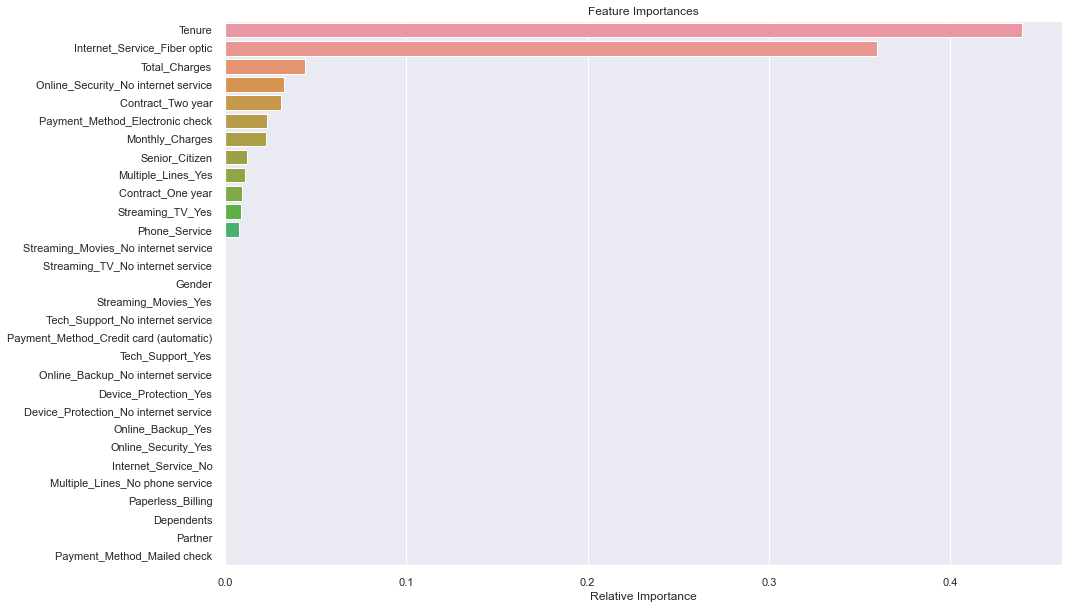

In [49]:
ax = sns.barplot(feature_importance["Imp"],feature_importance.index)
ax.set_title("Feature Importances")
ax.set_xlabel("Relative Importance")

# Comparing the performance of the three models 

In [50]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.998022,0.787426,0.798197
Recall,0.992556,0.408602,0.633581
Precision,1.000000,0.662198,0.617244
F1,0.996264,0.505371,0.625306


In [53]:
models_train_comp_df.to_html('trainanalytics.html')

- Comparing the training set results.

In [54]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.726667,0.796410,0.797436
Recall,0.500000,0.401186,0.614625
Precision,0.474672,0.683502,0.608611
F1,0.487007,0.505604,0.611603


- Comparing the test set results.

# Conclusions

- Tenure has the highest feature Importance which we could see from Milestone 1, and confirmed here using the decision tree model. Tenure had a high negative correlation. Which means as Tenure would increase the likelihood of customer churning decreased.

- Next was Fiber-optic service also having a high impact on churn rate nearly 42% of customers who get Fiber-Optic service end up churning.

- Total Charges have the third highest predictor of a customer churning. As their total charges increases, their likelihood of them churning increases. 

# Recommendations

-  Seeing as Tenure is has the highest importance the company should look into possibly doing something that would better guarantee a customer stays with the company beyond 6 months as the likelihood that they stay beyond 6 months increases, possibly some kind of promotional pricing with time constraint.

-  Fiber-Optic service is one of the highest churners, I would recommend a promo price deal for Fiber Optic service where they pay less for the first year and then maybe the price steps up after that first year.

-  I would also suggest a Promo package deal where Customers get Fiber-Optic bundled along-side the other services we provide like tech support, online security and back up, and possibly streaming movies and Tv and the longer the contract the better the pricing to incentivize joining with a Contract 